# **Trabajo Práctico Nº 3 Parte 1: Generación de números aleatorios**

Simulación - Ingeniería en Sistemas de Información 2022

**Pre-requisitos**

*  Tener una cuenta de Google (gmail)
*  Tener instalado el navegador Google Chrome
*  Contar con conectividad a Internet
*  Poseer conocimientos básicos de programación con el lenguaje Python

**Metodología de trabajo**

Antes de empezar a trabajar, debe crear una copia de este cuaderno de la siguiente manera:

*  Click en File (Archivo)
*  Save a Copy in Drive (Guardar una copia en Drive)
*  Renombre el archivo con el el/los apellido/s del grupo: Apellido1_Apellido2_Apellido3. Ipynb



# Ejercicio 1

El siguiente código contiene el algoritmo que produce la secuencia de números pseudoaleatorios calculados a partir del método congruencial lineal. Analizar e introducir código para:

> a.	Asegurar que los valores que se ingresan como semilla, elemento multiplicador e incremento o constante aditiva sean los adecuados de acuerdo a la definición del generador.

> b.	Indicar si el algoritmo representa un generador congruencial multiplicativo o un generador congruencial mixto de acuerdo a los datos de entrada.


> c.	Determinar la longitud del período.



In [559]:
def MetodoConguencialLineal(x, a, b, mod):
    periodo = 0
    bandera = 0
 
    while(bandera != x):
        if (periodo == 0):
            bandera = x
        x = ((a * x) + b) % mod 
        periodo = periodo + 1
        if (bandera == x): break
        print(x)
 
    if(periodo == mod):
        print("El generador es de ciclo completo")
    else:
        print("El generador es de ciclo incompleto")
 
def main():
    m = int(input("Ingrese el valor del módulo: "))
    x = int(input("Ingrese  el valor de la semilla: "))
    a = int(input("Ingrese el valor del multiplicador: "))
    b = int(input("Ingrese el valor de la constante aditiva: "))

    MetodoConguencialLineal(x,a,b,m)
 
if __name__ == "__main__":
    main()

## Respuesta

**Nota:**

### Análisis del código

El código del **Ejercicio 1** implementa el método congruencial lineal, que es un algoritmo para generar números pseudoaleatorios a partir de una semilla, un multiplicador, una constante aditiva y un módulo. El usuario ingresa los valores de estos parámetros y el código genera una secuencia de números pseudoaleatorios.

*a.* Podemos verificar que los valores ingresados sean los adecuados con el siguiente código:

In [560]:
def verify_input(x: int, a: int, b: int, m: int):
    if x <= 0:
        raise ValueError("El valor de 'x' debe ser mayor a 0")
    if 0 < a < m:
        raise ValueError("El valor de 'a' debe ser mayor a 0 y menor a 'm'")
    if 0 <= b < m:
        raise ValueError("El valor de 'b' debe ser mayor o igual a 0 y menor a 'm'")
    if m <= 0:
        raise ValueError("El valor de 'm' debe ser mayor a 0")

b. Para saber el tipo de generador podemos verificar el valor de $b$. Si $b = 0$, entonces el generador es multiplicativo. Si $b \neq 0$ el generador es mixto.

In [561]:
def show_generator_type(b: int):
    if b == 0:
        print("El generador es congruencial lineal multiplicativo")
    else:
        print("El generador es congruencial lineal mixto")

c. La longitud del periodo se puede obtener directamente por el valor de la variable `periodo` de la función `MetodoConguencialLineal()`.

### Creación de Generadores de Números Pseudoaleatorios

Para facilitar la creación de generadores de números pseudoaleatorios a lo largo del trabajo práctico, se decidió abstraer el concepto de *generador de números aleatorios* con la clase `Generator`. Todos los generadores son subclases `Generador`, y deben implementar el método `get_random_numbers()`, el cual devuelve la secuencia de números pseudoaleatorios generados. También deben implementar el método `verify_parameters()`, que verifica la validez de los parámetros del generador.

Además, todas las subclases de `Generador` cuentan con el método `plot_random_numbers()`, que grafica la secuencia de números pseudoaleatorios en el plano $xy$, donde el eje $x$ representa el índice $i$ del número pseudoaleatorio, y el eje $y$ representa el valor del número psuedoaleatorio $\mu_i$. Éste método admite el parámetro `join_points`, que en el caso de ser verdadero, une los puntos entre los números pseudoaleatorios, facilitando la visualizacion del orden de la secuencia $\mu_1, \mu_2, \dots, \mu_n$ generada.

In [562]:
from abc import ABC
from abc import abstractmethod

from matplotlib import pyplot as plt

class Generator(ABC):
    
    SAVE_RAW_SEQUENCE = False 

    @abstractmethod
    def get_random_numbers(self):
        pass

    @abstractmethod
    def verify_parameters(self):
        pass
    
    def plot_random_numbers(self, join_points=True):
        _, axes = plt.subplots()
        rand_nums = self.get_random_numbers()
        if join_points:
            axes.plot(range(len(rand_nums)), rand_nums, color="#19A7CE")
        axes.scatter(range(len(rand_nums)), rand_nums, color="#146C94")

        plt.ylabel('Número Pseudoaleatorio ($\mu_i$)', fontsize=10)
        plt.xlabel('Índice ($i$)', fontsize=10)

    def __len__(self):
        return len(self.get_random_numbers())
    
    def __str__(self):
        str_random_nums = [str(x) for x in self.get_random_numbers()]
        return " ".join(str_random_nums)

*Nota:* la constante `SAVE_RAW_SEQUENCE` define si los generadores de números aleatorios guardarán la secuencia de números aleatorios generados como valores entre $0$ y $1$ (en el caso de que `SAVE_RAW_SEQUENCE` sea falso) o como una secuencia de números enteros entre $0$ y $m-1$ (en el caso de que `SAVE_RAW_SEQUENCE` sea verdadero).


La clase `LinearCongruentialGenerator` abstrae el concepto de un generador lineal congruencial. Implementa el método `get_random_numbers()`, común a todos los generadores congruencial lineal. 

In [563]:
class LinearCongruentialGenerator(Generator, ABC):
    def __init__(self, seed: int, a: int, b: int, m: int):
        self.x0 = seed
        self.a = a
        self.b = b
        self.m = m
        self.verify_parameters()

    def verify_parameters(self):
        if self.a <= 0 or self.a >= self.m:
            raise ValueError("'a' must be greater than 0 and less than 'm'")
        if self.b < 0 or self.b >= self.m:
            raise ValueError("'b' must be greater or equal than 0 and less than 'm'")
        if self.m <= 0:
            raise ValueError("'m' must be greater than 0")
        if self.x0 < 0 or self.x0 >= self.m:
            raise ValueError("'x0' must be greater or equal than 0 and less than 'm'")

    def get_random_numbers(self):
        x = self.x0
        random_numbers = []
        while x not in random_numbers:
            random_numbers.append(x)
            x = (self.a * x + self.b) % self.m
        
        if self.SAVE_RAW_SEQUENCE:
            return random_numbers
        
        return [x/self.m for x in random_numbers]
    
    @abstractmethod
    def has_max_sequence(self):
        pass

A continuación se mostrará la clase `MixedCongruentialGenerator`, que representa un generador congruencial lineal mixto, es decir, $b \neq 0$. También se incluye la función `greater_common_divisor(n1, n2)` que devuelve el máximo común divisor mas grande de los números $n_1, n_2$; y la función `prime_factors(n)` que retorna los factores primos del número $n$.

In [564]:
def greater_common_divisor(n1: int, n2: int):
    while n2 != 0:
        n1, n2 = n2, n1 % n2
    return n1

def prime_factors(n: int):
    i = 2
    factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return tuple(set(factors))


class MixedCongruentialGenerator(LinearCongruentialGenerator):
    def __init__(self, seed: int, a: int, b: int, m: int):
        super().__init__(seed, a, b, m)
    
    def has_max_sequence(self):
        # b and m are coprime:
        if greater_common_divisor(self.b, self.m) != 1:
            return False
        
        # a - 1 is divisible by all prime factors of m:
        for factor in prime_factors(self.m):
            if (self.a - 1) % factor != 0:
                return False
        
        # a - 1 is divisible by 4 if m is divisible by 4:
        if self.m % 4 == 0 and (self.a - 1) % 4 != 0:
            return False
        
        return True

Para verificar el funcionamiento de la clase `MixedCongruentialGenerator`, crearemos dos instancias con los parámetros establecidos en la tabla del *ejercicio 1* del trabajo práctico.

#### Generador Congruencial Mixto N°1

* Semilla: $x_0 = 27$
* Incremento: $b = 5$
* Módulo: $m = 128$
* Multiplicador: $a = 43$ 

In [565]:
generator1 = MixedCongruentialGenerator(seed=27, a=43, b=5, m=128)

if generator1.has_max_sequence():
    print("El generador es de ciclo completo") 
else:
    print("El generador es de ciclo incompleto")

print(f"El periodo de números aleatorios es: {generator1}")
print(f"La longitud del periodo es: {len(generator1)}")


El generador es de ciclo incompleto
El periodo de números aleatorios es: 0.2109375 0.109375 0.7421875 0.953125 0.0234375 0.046875 0.0546875 0.390625 0.8359375 0.984375 0.3671875 0.828125 0.6484375 0.921875 0.6796875 0.265625 0.4609375 0.859375 0.9921875 0.703125 0.2734375 0.796875 0.3046875 0.140625 0.0859375 0.734375 0.6171875 0.578125 0.8984375 0.671875 0.9296875 0.015625 0.7109375 0.609375 0.2421875 0.453125 0.5234375 0.546875 0.5546875 0.890625 0.3359375 0.484375 0.8671875 0.328125 0.1484375 0.421875 0.1796875 0.765625 0.9609375 0.359375 0.4921875 0.203125 0.7734375 0.296875 0.8046875 0.640625 0.5859375 0.234375 0.1171875 0.078125 0.3984375 0.171875 0.4296875 0.515625
La longitud del periodo es: 64


Podemos visualizar los números aleatorios generados en el siguiente gráfico:

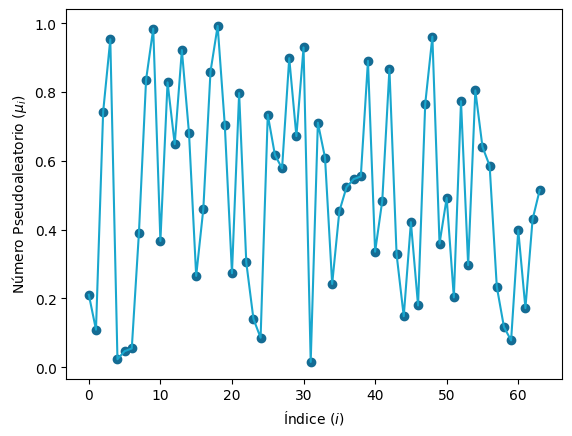

In [566]:
generator1.plot_random_numbers()

#### Generador Congruencial Mixto N°2

* Semilla: $x_0 = 94$
* Incremento: $b = 89$
* Módulo: $m = 128$
* Multiplicador: $a = 81$ 

In [567]:
generator2 = MixedCongruentialGenerator(seed=94, a=81, b=89, m=128)

if generator2.has_max_sequence():
    print("El generador es de ciclo completo") 
else:
    print("El generador es de ciclo incompleto")

print(f"El periodo de números aleatorios es: {generator2}")
print(f"La longitud del periodo es: {len(generator2)}")

El generador es de ciclo completo
El periodo de números aleatorios es: 0.734375 0.1796875 0.25 0.9453125 0.265625 0.2109375 0.78125 0.9765625 0.796875 0.2421875 0.3125 0.0078125 0.328125 0.2734375 0.84375 0.0390625 0.859375 0.3046875 0.375 0.0703125 0.390625 0.3359375 0.90625 0.1015625 0.921875 0.3671875 0.4375 0.1328125 0.453125 0.3984375 0.96875 0.1640625 0.984375 0.4296875 0.5 0.1953125 0.515625 0.4609375 0.03125 0.2265625 0.046875 0.4921875 0.5625 0.2578125 0.578125 0.5234375 0.09375 0.2890625 0.109375 0.5546875 0.625 0.3203125 0.640625 0.5859375 0.15625 0.3515625 0.171875 0.6171875 0.6875 0.3828125 0.703125 0.6484375 0.21875 0.4140625 0.234375 0.6796875 0.75 0.4453125 0.765625 0.7109375 0.28125 0.4765625 0.296875 0.7421875 0.8125 0.5078125 0.828125 0.7734375 0.34375 0.5390625 0.359375 0.8046875 0.875 0.5703125 0.890625 0.8359375 0.40625 0.6015625 0.421875 0.8671875 0.9375 0.6328125 0.953125 0.8984375 0.46875 0.6640625 0.484375 0.9296875 0.0 0.6953125 0.015625 0.9609375 0.53125 0.7

Podemos visualizar los números aleatorios generados en el siguiente gráfico:

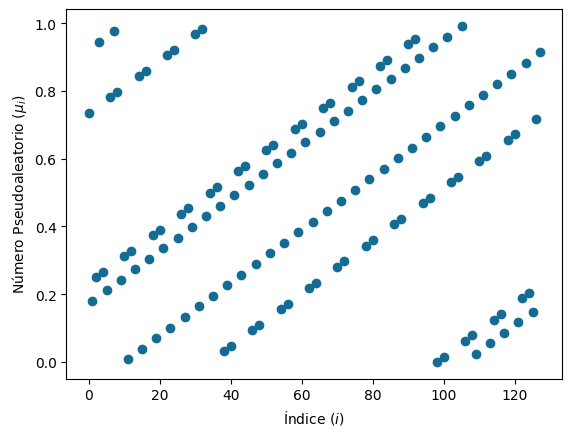

In [568]:
generator2.plot_random_numbers(join_points=False)

**Nota:** El parámetro `join_points=False` evita que se dibuje la línea que une los puntos (numeros aleatorios) en el gráfico. Esto es debido a que los números aleatorios se encuentran muy juntos en el gráfico, y la línea dificulta el entendimiento del mismo.
 
Como se puede apreciar, los números generados aprentan seguir cierta secuencia, por lo que podemos decir que los números aleatorios generados con el **Generador Congruencial Mixto N°2** no cumplen con independencia.

# Ejercicio 2

Escribir código para un generador congruencial multiplicativo con módulo primo.

> a. Indicar si puede o no alcanzar la secuencia máxima de números pseudoaleatorios sin repetir. Si el módulo es m, la máxima secuencia posible tiene longitud m-1. 

> b. Escribir la secuencia de números obtenidos y la longitud del período correspondiente.

## Respuesta

A continuación se mostrará la clase `MultiplicativeGenerator`, que representa un generador congruencial lineal multiplicativo, es decir, $b = 0$.

In [569]:
class MultiplicativeCongruentialGenerator(LinearCongruentialGenerator):
    def __init__(self, seed: int, a: int, m: int):
        super().__init__(seed, a, 0, m)

    def verify_parameters(self):
        super().verify_parameters()
        if self.b != 0:
            raise ValueError("'b' must be 0")

    def is_m_prime(self):
        return prime_factors(self.m) == (self.m,)

    def has_max_sequence(self):
        # m is prime
        if not self.is_m_prime():
            return False

        # a^[(m-1)/q] mod m != 1 for all prime factors q of m-1
        for factor in prime_factors(self.m - 1):
            if self.a**((self.m-1) // factor) % self.m == 1:
                return False 
        
        return True

Para verificar el funcionamiento de la clase `MultiplicativeCongruentialGenerator`, crearemos una instancia con los parámetros establecidos en el enunciado del *ejercicio 2* (*Generador Congruencial Multiplicativo N°1*) y otro con distintos parámetros que aseguran un ciclo de $m-1$ (*Generador Congruencial Multiplicativo N°2*).

#### Generador Congruencial Multiplicativo N°1

* Semilla: $x_0 = 5$
* Módulo: $m = 67$
* Multiplicador: $a = 43$ 

In [570]:
generator3 = MultiplicativeCongruentialGenerator(seed=5, a=43, m=67)

if generator3.has_max_sequence():
    print("El generador alcanza la máxima secuencia de números posibles (m-1)") 
else:
    print("El generador no alcanza la máxima secuencia de números posibles (m-1)") 

print(f"El periodo de números aleatorios es: {generator3}")
print(f"La longitud del periodo es: {len(generator3)}")

El generador no alcanza la máxima secuencia de números posibles (m-1)
El periodo de números aleatorios es: 0.07462686567164178 0.208955223880597 0.9850746268656716 0.3582089552238806 0.40298507462686567 0.3283582089552239 0.11940298507462686 0.13432835820895522 0.7761194029850746 0.373134328358209 0.04477611940298507 0.9253731343283582 0.7910447761194029 0.014925373134328358 0.6417910447761194 0.5970149253731343 0.6716417910447762 0.8805970149253731 0.8656716417910447 0.22388059701492538 0.6268656716417911 0.9552238805970149
La longitud del periodo es: 22


Podemos visualizar los números aleatorios generados en el siguiente gráfico:

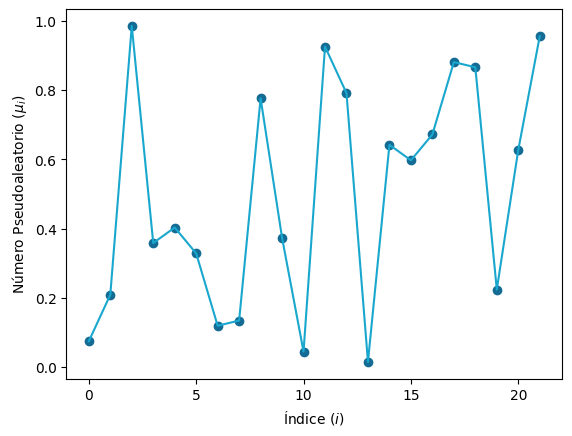

In [571]:
generator3.plot_random_numbers()

#### Generador Congruencial Multiplicativo N°2

* Semilla: $x_0 = 5$
* Módulo: $m = 31$
* Multiplicador: $a = 3$ 

In [572]:
generator4 = MultiplicativeCongruentialGenerator(seed=5, a=3, m=31)

if generator4.has_max_sequence():
    print("El generador alcanza la máxima secuencia de números posibles (m-1)") 
else:
    print("El generador no alcanza la máxima secuencia de números posibles (m-1)") 

print(f"El periodo de números aleatorios es: {generator4}")
print(f"La longitud del periodo es: {len(generator4)}")

El generador alcanza la máxima secuencia de números posibles (m-1)
El periodo de números aleatorios es: 0.16129032258064516 0.4838709677419355 0.45161290322580644 0.3548387096774194 0.06451612903225806 0.1935483870967742 0.5806451612903226 0.7419354838709677 0.22580645161290322 0.6774193548387096 0.03225806451612903 0.0967741935483871 0.2903225806451613 0.8709677419354839 0.6129032258064516 0.8387096774193549 0.5161290322580645 0.5483870967741935 0.6451612903225806 0.9354838709677419 0.8064516129032258 0.41935483870967744 0.25806451612903225 0.7741935483870968 0.3225806451612903 0.967741935483871 0.9032258064516129 0.7096774193548387 0.12903225806451613 0.3870967741935484
La longitud del periodo es: 30


Podemos visualizar los números aleatorios generados en el siguiente gráfico:

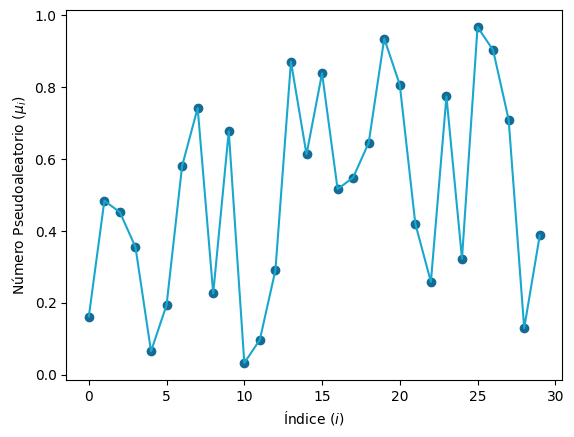

In [573]:
generator4.plot_random_numbers()

# Ejercicio 3

Obtener números a partir de un generador de cuadrados medios. 

> a.	El usuario debe indicar la cantidad de dígitos que tendrá cada número pseudoaleatorio.

> b.	Si no es posible determinar la parte central, completar el número agregando ceros hacia la derecha.

> c.	Mostrar la secuencia de números sin repetición y longitud del período correspondiente.


## Respuesta

A continuación se muestra la clase `MiddleSquare`, que representa un generador de cuadrados medios. El método privado `_fill_zeros()` añade los ceros necesarios a $x_i^2$, y `_get_middle()` extrae los $k$ números centrales. 

In [574]:
class MiddleSquare(Generator):
    def __init__(self, k: int, seed: int):
        self.k = k
        self.seed = seed
        self.verify_parameters()

    def verify_parameters(self):
        if self.k <= 0:
            raise ValueError("'k' must be greater than 0")
        if self.seed <= 0:
            raise ValueError("'seed' must be greater than 0")

    def _get_middle(self, number: int):
        n_squared_str = str(number ** 2)
        start = (len(n_squared_str) - self.k) // 2
        end = start + self.k
        return int(n_squared_str[start:end])
    
    def _fill_zeros(self, number: int):
        n_squared_str = str(number ** 2)
        while len(n_squared_str) < self.k:
            n_squared_str = n_squared_str + "0"
        while len(n_squared_str) % 2 != self.k % 2:
            n_squared_str = n_squared_str + "0"
        return int(n_squared_str)

    def get_random_numbers(self):
        x = self.seed
        random_numbers = []
        while x not in random_numbers:
            random_numbers.append(x)
            x = self._get_middle(self._fill_zeros(x))

        if self.SAVE_RAW_SEQUENCE:
            return random_numbers
        
        return [x/10**self.k for x in random_numbers]

Para verificar el funcionamiento de la clase `MiddleSquare`, crearemos una instancia con los parámetros establecidos en el enunciado del *ejercicio 3* (*Generador Cuadrados Medios N°1*).

#### Generador Cuadrados Medios N°1

* Semilla: $x_0 = 1598$
* Números seleccionados: $k = 4$ 

In [575]:
generator5 = MiddleSquare(seed=1598, k=4)

print(f"El periodo de números aleatorios es: {generator5}")
print(f"La longitud del periodo es: {len(generator5)}")

El periodo de números aleatorios es: 0.1598 0.9338 0.3756 0.2571 0.4202 0.2727 0.6356 0.787 0.9581 0.5019 0.4287 0.4447 0.2621 0.6746 0.5028 0.8039 0.7964 0.8172 0.9961 0.0229 0.0584 0.1919 0.5551 0.8006 0.183 0.3121 0.8709 0.9018 0.5674 0.1407 0.1016 0.5244 0.448 0.0956 0.7901 0.063 0.2961 0.2448 0.0123 0.8866 0.6318 0.6788 0.4768 0.6753 0.4429 0.9064 0.4109 0.5437 0.0888 0.0163 0.9117 0.2699 0.1172 0.33 0.21 0.0
La longitud del periodo es: 56


Podemos visualizar los números aleatorios generados en el siguiente gráfico:

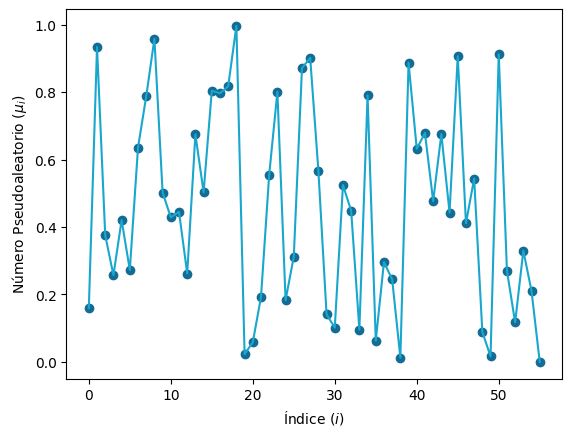

In [576]:
generator5.plot_random_numbers()

# Generador Personalizado

En esta sección encontrará un script para que el usuario pueda elegir el generador a utilizar, cargarle sus parámetros y visualizar la secuencia de números pseudoaleatorios generados.

**Nota:** para el correcto funcionamiento del script se requiere que las celdas anteriores se encuentren ejecutadas, ya que se utilizan las clases `MultiplicativeCongruentialGenerator`, `MixedCongruentialGenerator` y `MiddleSquare`.

In [577]:
options = {
    "1":"Generador Congruencial Lineal Multiplicativo",
    "2":"Generador Congruencial Lineal Mixto",
    "3":"Generador de los Cuadrados Medios"
    }

def menu():
    for i, option in options.items():
        print(f"[{i}] {option}")

    option = int(input("Seleccionar una opción: "))
        
    if option == 1:
        a = int(input("Ingresar el valor de 'a':"))
        m = int(input("Ingresar el valor de 'm':"))
        x0 = int(input("Ingresar el valor de 'x0':"))
        generator = MultiplicativeCongruentialGenerator(seed=x0, a=a, m=m)
    
    elif option == 2:
        a = int(input("Ingresar el valor de 'a':"))
        b = int(input("Ingresar el valor de 'b':"))
        m = int(input("Ingresar el valor de 'm':"))
        x0 = int(input("Ingresar el valor de 'x0':"))
        generator = MixedCongruentialGenerator(seed=x0, a=a, b=b, m=m)

    elif option == 3:
        k = int(input("Ingresar el valor de 'k':"))
        x0 = int(input("Ingresar el valor de 'x0':"))
        generator = MiddleSquare(seed=x0, k=k)
    
    print("Resultado:")
    print(f"La secuencia generada es: {generator}")
    print(f"La longitud del periodo es: {len(generator)}")
    
    generator.plot_random_numbers()


if __name__ == "__main__":
    menu()